In [1]:
import pandas as pd, requests

In [2]:
import os 
import logging
from typing import Dict, Tuple, List

In [180]:
import operator
import numpy as np
from datetime import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

In [21]:
cities = ["Mont Saint Michel","St Malo","Bayeux","Le Havre","Rouen","Paris","Amiens","Lille","Strasbourg",
          "Chateau du Haut Koenigsbourg","Colmar","Eguisheim","Besancon","Dijon","Annecy","Grenoble","Lyon",
          #"Gorges du Verdon",
          "Bormes les Mimosas","Cassis","Marseille","Aix en Provence","Avignon","Uzes","Nimes",
          "Aigues Mortes","Saintes Maries de la mer","Collioure","Carcassonne","Ariege","Toulouse","Montauban",
          "Biarritz","Bayonne","La Rochelle"]

## Retrieve citie's coordinates

In [19]:
'''
    Retrieves location data of a city in a dictionary.  The data retrieved is:
      place_id': 256949255,
     'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
     'osm_type'
     'osm_id'
     'boundingbox': ['48.6119741', '48.637031', '-1.5495487', '-1.5094805'],
     'lat': 
     'lon': 
     'display_name': 'Le Mont-Saint-Michel, Avranches, Manche, Normandie, France métropolitaine, 50170, France',
     'place_rank': 16,
     'category': 'boundary',
     'type': 'administrative',
     'importance': 
     'icon':
    -----------------------------
    Parameters
    -----------------------------
    city: The city name
    
'''
def retrieve_one_city(city:str)->dict:
    url = f'https://nominatim.openstreetmap.org/search?country=France&format=jsonv2&class=boundary&limit=1&city={city}'
    result = requests.get(url)
    try:
        print(f'API nominatim response : {city} ')
        return result.json()[0]
    except IndexError as error:
        print('There is no result in the query for {city}')
        return None

In [7]:
url ='https://nominatim.openstreetmap.org/status.php'
result = requests.get(url)
print(result)


<Response [200]>


In [22]:
def retrieve_cities(city_names)->list:
    retrieved_cities = list()
    for city in city_names:
        print(f'Retrieving coordinates from {city} ...')
        data = retrieve_one_city(city) #city_data is a dictionary
        if data is not None:
            city_dict = {'place': city, **data} ## ** used to unpack the elements of the dictionary
            retrieved_cities.append(city_dict)   
        else:
            print(f'No coordinates found for {city}')
    return retrieved_cities

In [23]:
retrieved_cities=retrieve_cities(cities)

Retrieving coordinates from Mont Saint Michel ...
API nominatim response : <Response [200]> 
result.jason of Mont Saint Michel: [{'place_id': 151486647, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 211285890, 'boundingbox': ['48.6349172', '48.637031', '-1.5133292', '-1.5094796'], 'lat': '48.6359541', 'lon': '-1.511459954959514', 'display_name': 'Mont Saint-Michel, Le Mont-Saint-Michel, Avranches, Manche, Normandie, France métropolitaine, 50170, France', 'place_rank': 20, 'category': 'place', 'type': 'islet', 'importance': 0.8654365567815739}]
[{"place_id":151486647,"licence":"Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright","osm_type":"way","osm_id":211285890,"boundingbox":["48.6349172","48.637031","-1.5133292","-1.5094796"],"lat":"48.6359541","lon":"-1.511459954959514","display_name":"Mont Saint-Michel, Le Mont-Saint-Michel, Avranches, Manche, Normandie, France métropolitaine, 50170, France","p

In [24]:
len(retrieved_cities)

33

### Put retrieved cities in a data frame

In [25]:
cities_df = pd.DataFrame(retrieved_cities)

In [178]:
cities_df.head(4)

,place,place_id,licence,osm_type,osm_id,boundingbox,lat,lon,display_name,place_rank,category,type,importance,icon
0,Mont Saint Michel,151486647,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,211285890,"[48.6349172, 48.637031, -1.5133292, -1.5094796]",48.6359541,-1.511459954959514,"Mont Saint-Michel, Le Mont-Saint-Michel, Avran...",20,place,islet,0.865437,NaN
1,St Malo,282098015,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,905534,"[48.5979853, 48.6949736, -2.0765246, -1.9367259]",48.649518,-2.0260409,"Saint-Malo, Ille-et-Vilaine, Bretagne, France ...",16,boundary,administrative,0.786467,https://nominatim.openstreetmap.org/ui/mapicon...
2,Bayeux,281962470,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,145776,"[49.2608124, 49.2934736, -0.7275671, -0.6757378]",49.2764624,-0.7024738,"Bayeux, Calvados, Normandie, France métropolit...",16,boundary,administrative,0.792700,https://nominatim.openstreetmap.org/ui/mapicon...
3,Le Havre,282341149,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,104492,"[49.4516697, 49.5401463, 0.0667992, 0.1955556]",49.4938975,0.1079732,"Le Havre, Seine-Maritime, Normandie, France mé...",16,boundary,administrative,0.932333,https://nominatim.openstreetmap.org/ui/mapicon...


### Save cities dataframe in a file

In [28]:
cities_df.to_csv('../data/cities.csv', sep='\t')

In [29]:
coords = list(zip(cities_df.lat.to_list(), cities_df.lon.to_list()))

In [30]:
coords

[('48.6359541', '-1.511459954959514'),
 ('48.649518', '-2.0260409'),
 ('49.2764624', '-0.7024738'),
 ('49.4938975', '0.1079732'),
 ('49.4404591', '1.0939658'),
 ('48.8588897', '2.3200410217200766'),
 ('49.8941708', '2.2956951'),
 ('50.6365654', '3.0635282'),
 ('48.584614', '7.7507127'),
 ('48.2495226', '7.3454923'),
 ('48.0777517', '7.3579641'),
 ('48.0447968', '7.3079618'),
 ('47.2380222', '6.0243622'),
 ('47.3215806', '5.0414701'),
 ('45.8992348', '6.1288847'),
 ('45.1875602', '5.7357819'),
 ('45.7578137', '4.8320114'),
 ('43.1572172', '6.329253867921363'),
 ('43.2140359', '5.5396318'),
 ('43.2961743', '5.3699525'),
 ('43.5298424', '5.4474738'),
 ('43.9492493', '4.8059012'),
 ('44.0121279', '4.4196718'),
 ('43.8374249', '4.3600687'),
 ('43.5658225', '4.1912837'),
 ('43.4522771', '4.4287172'),
 ('42.52505', '3.0831554'),
 ('43.2130358', '2.3491069'),
 ('43.6044622', '1.4442469'),
 ('44.0175835', '1.3549991'),
 ('43.4832523', '-1.5592776'),
 ('43.4933379', '-1.475099'),
 ('46.1591126',

Transform lat et lon attributs from str to float

In [184]:
cities_df = cities_df.astype({'lat':np.float16, 'lon':np.float16})

## Getting the weather

In [31]:
class City:
    def __init__(self, place_id, name, coords:tuple):
        self._place_id=place_id
        self._name=name
        self._coords=coords
        self._scrapped = {}
    
    @property
    def place_id(self):
        return self._place_id
    @property
    def name(self):
        return self._name
    
    @property
    def coords(self):
        return self._coords
    @property
    def scrapped(self):
        return self._scrapped
        
    @scrapped.setter
    def scrapped(self,value:dict):
        self._scrapped=value
    
    @staticmethod
    def from_dataframe(dataframe: pd.DataFrame):
        '''
        Create a list of objects of class City from a rows of a DataFrame
        '''
        #TODO Check first if it contains the columns we need
        cities=list()
        try:
            for index_row in range(0,dataframe.shape[0]):
                place_id = str(dataframe.loc[index_row, 'place_id'])
                coords = (dataframe.loc[index_row, 'lat'], dataframe.loc[index_row, 'lon'])
                name = dataframe.loc[index_row, 'place']
                city = City(place_id, name, coords)
                cities.append(city)
        except KeyError as keyerr:
            print('The dataframe doesn''t have all required keys')
            return None
        else:
            return cities
        
    def __str__(self):
        return f'city:{self.name} place_id:{self.place_id} coords:{self.coords} scrapped:{self.scrapped}'

#### Create a list of objects City

In [32]:
cities_list = City.from_dataframe(cities_df)

In [33]:
def read_api_key():
    pass

In [38]:
def get_weather(cities:List[City]):
    '''
    For every city in the list of cities, retrieves the weather data and completes it directly in each object City
    The property scrapped from object City is completed with result.json from the api call
    Parameters
    ---------------
    cities: List of elements of type City
    
    Returns
    Nothing.  
    
    '''
    api_key='662b304886186ebe717af2be19cb4764'
    units='metric'
    part='minutely,hourly'
    for city in cities:
        lat=city.coords[0]
        lon=city.coords[1]
        url = f'https://api.openweathermap.org/data/2.5/onecall?lat={lat}&lon={lon}&exclude={part}&appid={api_key}&units={units}'
        r = requests.get(url)
        city.scrapped=r.json()

### Create a list of objects City

In [42]:
def add_place_to_dict(city:City):
    city.scrapped['place_id']=city.place_id
    city.scrapped['current']['place_id'] = city.place_id
    city.scrapped['place']=city.name
     #data['place_id'] = place_id

In [41]:
def add_place_to_list(city:City):
    '''
    Retrieves the forecast list from the scrapped data and adds the place_id to each dictionary in the list.
    '''
    for day_dict in city.scrapped['daily']: #city.scrapped['daily'] contains a list. Each element is a dict.
        day_dict['place_id']=city.place_id 
        day_dict['place']=city.name
    

In [43]:
'''
    From a city containing scrapped data, it transforms the scrapped data in a pandas.Dataframe
'''
def process_city(city: City)->pd.DataFrame:
    add_place_to_dict(city)
    add_place_to_list(city)
    current_df = pd.DataFrame(city.scrapped['current'])
    forcast_df = pd.DataFrame(city.scrapped['daily'])
    return pd.concat([current_df,forcast_df], ignore_index=True)


In [44]:
city = cities_list[0]


### Launch the weather retrieval for all cities

In [39]:
get_weather(cities_list) #cities list is a List of objects City

In [45]:
df_list = list() #list of dataframes, each containing data from a City
for city in cities_list:
    df_list.append(process_city(city))    

In [46]:
final_df = pd.concat(df_list, ignore_index=True)

In [47]:
final_df.shape

(297, 23)

In [56]:
final_df.head(4)

,dt,sunrise,sunset,temp,feels_like,pressure,humidity,dew_point,uvi,clouds,...,wind_gust,weather,place_id,moonrise,moonset,moon_phase,pop,place,rain,snow
0,1643227716,1643182996,1643216015,4.64,3.45,1035,77,0.96,0.00,100,...,1.71,"{'id': 804, 'main': 'Clouds', 'description': '...",151486647,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1643198400,1643182996,1643216015,"{'day': 5.59, 'min': 0.36, 'max': 5.92, 'night...","{'day': 4.71, 'night': 4.5, 'eve': 3.44, 'morn...",1036,78,1.91,1.02,63,...,2.65,"[{'id': 803, 'main': 'Clouds', 'description': ...",151486647,1.643161e+09,1.643196e+09,0.78,0.00,Mont Saint Michel,NaN,NaN
2,1643284800,1643269326,1643302511,"{'day': 9.27, 'min': 1.49, 'max': 9.57, 'night...","{'day': 7, 'night': 7.79, 'eve': 6.32, 'morn':...",1033,82,6.06,0.90,50,...,8.84,"[{'id': 500, 'main': 'Rain', 'description': 'l...",151486647,1.643252e+09,1.643285e+09,0.82,0.22,Mont Saint Michel,0.36,NaN
3,1643371200,1643355655,1643389007,"{'day': 10.39, 'min': 5.76, 'max': 10.94, 'nig...","{'day': 9.52, 'night': 5.86, 'eve': 6.19, 'mor...",1038,78,6.44,1.16,58,...,3.73,"[{'id': 803, 'main': 'Clouds', 'description': ...",151486647,1.643344e+09,1.643373e+09,0.86,0.00,Mont Saint Michel,NaN,NaN


In [54]:
print('Number of cities with weather information')
final_df.groupby('place_id')['dt'].count().count()

Number of cities with weather information


33

In [36]:
final_df.to_csv('./data/weather.csv', sep='\t')

In [57]:
def transform_to_datetime(dataframe, cols):
    #cols=['dt', 'sunrise', 'sunset']
    for col_name in cols:
        dataframe[col_name] = dataframe[col_name].apply(lambda x: dt.fromtimestamp(x))    

In [58]:
def transform_to_date(dataframe: pd.DataFrame, cols):
    for col_name in cols:
        dataframe[col_name] = dataframe[col_name].apply(lambda x: dt.fromtimestamp(x).replace(hour=0, minute=0, second=0))

In [59]:
transform_to_datetime(final_df, ['sunrise', 'sunset'])

In [60]:
transform_to_date(final_df, ['dt'])

In [165]:
final_df.head(5)

,dt,sunrise,sunset,temp,feels_like,pressure,humidity,dew_point,uvi,clouds,...,wind_gust,weather,place_id,moonrise,moonset,moon_phase,pop,place,rain,snow
0,2022-01-26,2022-01-26 08:43:16,2022-01-26 17:53:35,4.64,3.45,1035,77,0.96,0.00,100,...,1.71,"{'id': 804, 'main': 'Clouds', 'description': '...",151486647,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-26,2022-01-26 08:43:16,2022-01-26 17:53:35,"{'day': 5.59, 'min': 0.36, 'max': 5.92, 'night...","{'day': 4.71, 'night': 4.5, 'eve': 3.44, 'morn...",1036,78,1.91,1.02,63,...,2.65,"[{'id': 803, 'main': 'Clouds', 'description': ...",151486647,1.643161e+09,1.643196e+09,0.78,0.00,Mont Saint Michel,NaN,NaN
2,2022-01-27,2022-01-27 08:42:06,2022-01-27 17:55:11,"{'day': 9.27, 'min': 1.49, 'max': 9.57, 'night...","{'day': 7, 'night': 7.79, 'eve': 6.32, 'morn':...",1033,82,6.06,0.90,50,...,8.84,"[{'id': 500, 'main': 'Rain', 'description': 'l...",151486647,1.643252e+09,1.643285e+09,0.82,0.22,Mont Saint Michel,0.36,NaN
3,2022-01-28,2022-01-28 08:40:55,2022-01-28 17:56:47,"{'day': 10.39, 'min': 5.76, 'max': 10.94, 'nig...","{'day': 9.52, 'night': 5.86, 'eve': 6.19, 'mor...",1038,78,6.44,1.16,58,...,3.73,"[{'id': 803, 'main': 'Clouds', 'description': ...",151486647,1.643344e+09,1.643373e+09,0.86,0.00,Mont Saint Michel,NaN,NaN
4,2022-01-29,2022-01-29 08:39:42,2022-01-29 17:58:24,"{'day': 11.91, 'min': 8.05, 'max': 11.91, 'nig...","{'day': 11.3, 'night': 5.45, 'eve': 6.27, 'mor...",1035,82,8.75,1.26,41,...,10.29,"[{'id': 802, 'main': 'Clouds', 'description': ...",151486647,1.643435e+09,1.643463e+09,0.89,0.00,Mont Saint Michel,NaN,NaN


In [62]:
final_df[['place_id','place','dt','temp']].head(10)

,place_id,place,dt,temp
0,151486647,NaN,2022-01-26,4.64
1,151486647,Mont Saint Michel,2022-01-26,"{'day': 5.59, 'min': 0.36, 'max': 5.92, 'night..."
2,151486647,Mont Saint Michel,2022-01-27,"{'day': 9.27, 'min': 1.49, 'max': 9.57, 'night..."
3,151486647,Mont Saint Michel,2022-01-28,"{'day': 10.39, 'min': 5.76, 'max': 10.94, 'nig..."
4,151486647,Mont Saint Michel,2022-01-29,"{'day': 11.91, 'min': 8.05, 'max': 11.91, 'nig..."
5,151486647,Mont Saint Michel,2022-01-30,"{'day': 10.13, 'min': 6.5, 'max': 10.68, 'nigh..."
6,151486647,Mont Saint Michel,2022-01-31,"{'day': 8.84, 'min': 5.75, 'max': 9.73, 'night..."
7,151486647,Mont Saint Michel,2022-02-01,"{'day': 9.43, 'min': 5.47, 'max': 10.2, 'night..."
8,151486647,Mont Saint Michel,2022-02-02,"{'day': 10.82, 'min': 9.58, 'max': 10.82, 'nig..."
9,282098015,NaN,2022-01-26,4.51


In [74]:
def normalize_columns(dataframe:pd.DataFrame, columns:list())->pd.DataFrame:
    norm_list = list()# A list of DataFrames
    try:
        for col_name in columns:
            #Attention: json_normalize generates a dataframe with indexes starting at 0. 
            # If the input dataframe doesnt start at 0, the concat will not be well done.
            normalized_col = pd.json_normalize(dataframe[col_name]).rename(columns=lambda x: f'{col_name}_{x}')
            norm_list.append(normalized_col)
        normalized_df = pd.concat([dataframe.drop(columns, axis=1),*norm_list], axis=1)#Concatenates by index
        return normalized_df
    except KeyError as keyerr:
        print('Error, the columns were not normalized. One or more column names don''t exist in the DataFrame:', keyerr)
        raise KeyError

In [75]:
forecast_df = final_df.dropna(subset=['place'], axis=0).reset_index()

In [76]:
forecast_df = forecast_df[['dt', 'place_id', 'place', 'sunrise', 'sunset', 'temp', 'feels_like', 'pressure', 'humidity',
       'dew_point', 'uvi', 'clouds', 'visibility', 'wind_speed', 'wind_deg',
       'wind_gust', 'weather', 'moonrise', 'moonset', 'moon_phase',
       'pop', 'rain']]

In [77]:
forecast_df[['place_id','place','dt','temp']].sample(5)

,place_id,place,dt,temp
233,281776059,Montauban,2022-01-27,"{'day': 8.17, 'min': 1.58, 'max': 9.58, 'night..."
26,282341149,Le Havre,2022-01-28,"{'day': 7.98, 'min': 7, 'max': 8.64, 'night': ..."
113,282783909,Annecy,2022-01-27,"{'day': 6.57, 'min': -0.75, 'max': 7.73, 'nigh..."
119,282783909,Annecy,2022-02-02,"{'day': 7.23, 'min': 1.48, 'max': 8.05, 'night..."
112,282783909,Annecy,2022-01-26,"{'day': 7.39, 'min': -0.68, 'max': 8.57, 'nigh..."


In [164]:
forecast_df.head(3)

,dt,place_id,place,sunrise,sunset,pressure,humidity,dew_point,uvi,clouds,...,temp_day,temp_min,temp_max,temp_night,temp_eve,temp_morn,feels_like_day,feels_like_night,feels_like_eve,feels_like_morn
0,2022-01-26,151486647,Mont Saint Michel,2022-01-26 08:43:16,2022-01-26 17:53:35,1036,78,1.91,1.02,63,...,5.59,0.36,5.92,4.50,4.74,0.71,4.71,4.50,3.44,-1.67
1,2022-01-27,151486647,Mont Saint Michel,2022-01-27 08:42:06,2022-01-27 17:55:11,1033,82,6.06,0.90,50,...,9.27,1.49,9.57,8.96,8.48,2.02,7.00,7.79,6.32,-0.85
2,2022-01-28,151486647,Mont Saint Michel,2022-01-28 08:40:55,2022-01-28 17:56:47,1038,78,6.44,1.16,58,...,10.39,5.76,10.94,7.43,6.99,6.17,9.52,5.86,6.19,5.09


In [79]:
forecast_df = normalize_columns(forecast_df, ['temp', 'feels_like'])

In [80]:
forecast_df

,dt,place_id,place,sunrise,sunset,pressure,humidity,dew_point,uvi,clouds,...,temp_day,temp_min,temp_max,temp_night,temp_eve,temp_morn,feels_like_day,feels_like_night,feels_like_eve,feels_like_morn
0,2022-01-26,151486647,Mont Saint Michel,2022-01-26 08:43:16,2022-01-26 17:53:35,1036,78,1.91,1.02,63,...,5.59,0.36,5.92,4.50,4.74,0.71,4.71,4.50,3.44,-1.67
1,2022-01-27,151486647,Mont Saint Michel,2022-01-27 08:42:06,2022-01-27 17:55:11,1033,82,6.06,0.90,50,...,9.27,1.49,9.57,8.96,8.48,2.02,7.00,7.79,6.32,-0.85
2,2022-01-28,151486647,Mont Saint Michel,2022-01-28 08:40:55,2022-01-28 17:56:47,1038,78,6.44,1.16,58,...,10.39,5.76,10.94,7.43,6.99,6.17,9.52,5.86,6.19,5.09
3,2022-01-29,151486647,Mont Saint Michel,2022-01-29 08:39:42,2022-01-29 17:58:24,1035,82,8.75,1.26,41,...,11.91,8.05,11.91,8.07,8.65,8.94,11.30,5.45,6.27,7.34
4,2022-01-30,151486647,Mont Saint Michel,2022-01-30 08:38:26,2022-01-30 18:00:01,1034,70,4.66,1.05,94,...,10.13,6.50,10.68,6.50,7.55,9.56,9.03,6.50,6.59,8.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,2022-01-29,281822562,La Rochelle,2022-01-29 08:31:06,2022-01-29 18:04:08,1037,81,5.33,1.52,7,...,8.39,4.86,8.85,7.76,7.80,4.91,8.39,5.84,6.15,4.91
260,2022-01-30,281822562,La Rochelle,2022-01-30 08:29:58,2022-01-30 18:05:37,1033,85,6.75,0.83,74,...,9.16,6.12,9.45,8.64,9.03,6.12,9.16,6.91,7.09,3.19
261,2022-01-31,281822562,La Rochelle,2022-01-31 08:28:49,2022-01-31 18:07:06,1028,80,6.97,1.20,98,...,10.38,6.45,10.38,6.45,7.72,8.00,9.56,2.50,3.92,5.94
262,2022-02-01,281822562,La Rochelle,2022-02-01 08:27:38,2022-02-01 18:08:36,1036,77,4.79,2.00,35,...,8.67,5.16,9.12,8.36,8.32,5.16,6.11,5.16,4.96,1.34


In [81]:
forecast_df[0:2]

,dt,place_id,place,sunrise,sunset,pressure,humidity,dew_point,uvi,clouds,...,temp_day,temp_min,temp_max,temp_night,temp_eve,temp_morn,feels_like_day,feels_like_night,feels_like_eve,feels_like_morn
0,2022-01-26,151486647,Mont Saint Michel,2022-01-26 08:43:16,2022-01-26 17:53:35,1036,78,1.91,1.02,63,...,5.59,0.36,5.92,4.50,4.74,0.71,4.71,4.50,3.44,-1.67
1,2022-01-27,151486647,Mont Saint Michel,2022-01-27 08:42:06,2022-01-27 17:55:11,1033,82,6.06,0.90,50,...,9.27,1.49,9.57,8.96,8.48,2.02,7.00,7.79,6.32,-0.85


In [129]:
def plot_temperature(forecast_df):
    plt.figure(figsize=(14,8))
    sns.lineplot(x='dt', y='temp_day', data=forecast_df, hue='place')
    #sns.scatterplot(x='dt', y='temp_day', data=forecast_df, hue='place', size='temp_day')
    plt.show()
#forecast_df.iloc[0:14]


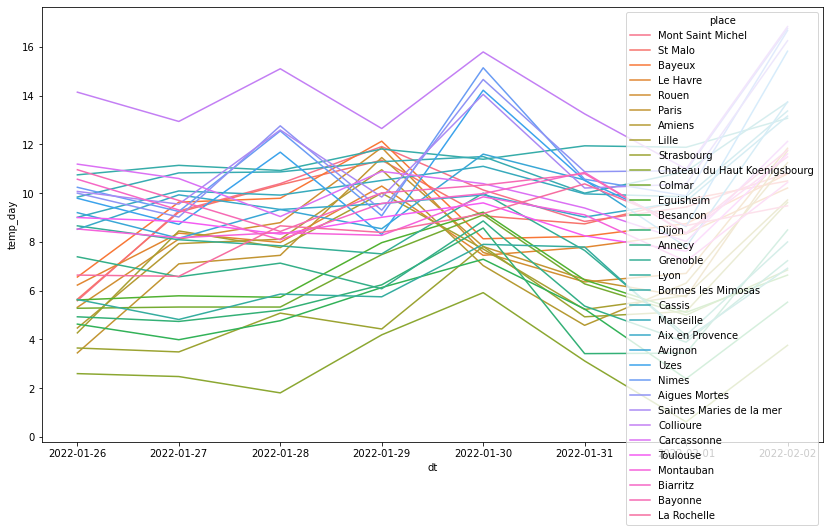

In [130]:
plot_temperature(forecast_df)

In [87]:
forecast_df.groupby('dt')['temp_day'].max()

dt
2022-01-26    14.14
2022-01-27    12.94
2022-01-28    15.10
2022-01-29    12.65
2022-01-30    15.79
2022-01-31    13.25
2022-02-01    11.88
2022-02-02    16.83
Name: temp_day, dtype: float64

In [104]:
df_ranks = forecast_df.copy()
df_ranks['ranking_day'] = forecast_df.groupby(['dt'])['temp_day'].rank(ascending=False)

In [108]:
df_ranks.sort_values('ranking_day', ascending=True)[['dt', 'place_id', 'place', 'weather', 'temp_day', 'temp_min','temp_max', 'ranking_day']]

,dt,place_id,place,weather,temp_day,temp_min,temp_max,ranking_day
208,2022-01-26,282185152,Collioure,"[{'id': 800, 'main': 'Clear', 'description': '...",14.14,7.24,15.11,1.0
209,2022-01-27,282185152,Collioure,"[{'id': 800, 'main': 'Clear', 'description': '...",12.94,7.08,13.86,1.0
210,2022-01-28,282185152,Collioure,"[{'id': 801, 'main': 'Clouds', 'description': ...",15.10,7.54,15.65,1.0
142,2022-02-01,282091180,Bormes les Mimosas,"[{'id': 800, 'main': 'Clear', 'description': '...",11.88,5.77,12.58,1.0
211,2022-01-29,282185152,Collioure,"[{'id': 800, 'main': 'Clear', 'description': '...",12.65,8.35,13.78,1.0
...,...,...,...,...,...,...,...,...
78,2022-02-01,49750339,Chateau du Haut Koenigsbourg,"[{'id': 616, 'main': 'Snow', 'description': 'r...",0.62,-0.60,1.22,33.0
73,2022-01-27,49750339,Chateau du Haut Koenigsbourg,"[{'id': 500, 'main': 'Rain', 'description': 'l...",2.48,-3.88,3.76,33.0
79,2022-02-02,49750339,Chateau du Haut Koenigsbourg,"[{'id': 500, 'main': 'Rain', 'description': 'l...",3.76,0.40,4.62,33.0
72,2022-01-26,49750339,Chateau du Haut Koenigsbourg,"[{'id': 800, 'main': 'Clear', 'description': '...",2.60,-4.48,3.36,33.0


Top 7 temperature by day

In [123]:
def top_5(dataframe:pd.DataFrame)->pd.DataFrame:
    df_ranks = dataframe.copy()
    df_ranks['ranking_day'] = dataframe.groupby(['dt'])['temp_day'].rank(ascending=False)#Ranking per highest temp_day 
    #dataframe[['dt', 'place', 'temp_day', 'ranking_day']].sort_values(['dt', 'ranking_day'])
    top_5_cities = df_ranks.groupby('place_id')['ranking_day'].agg('mean').sort_values(ascending=True)[0:6]
    top5_df = df_ranks[(df_ranks['place_id'].isin(top_5_cities.index.to_list())) & (df_ranks['ranking_day'] == 1)]
    print(top5_df.shape)
    return top5_df

In [125]:
top5 = top_5(forecast_df)
top5[['dt', 'place_id', 'place', 'weather', 'temp_day', 'temp_min','temp_max']].head(8)

(8, 31)


,dt,place_id,place,weather,temp_day,temp_min,temp_max
142,2022-02-01,282091180,Bormes les Mimosas,"[{'id': 800, 'main': 'Clear', 'description': '...",11.88,5.77,12.58
208,2022-01-26,282185152,Collioure,"[{'id': 800, 'main': 'Clear', 'description': '...",14.14,7.24,15.11
209,2022-01-27,282185152,Collioure,"[{'id': 800, 'main': 'Clear', 'description': '...",12.94,7.08,13.86
210,2022-01-28,282185152,Collioure,"[{'id': 801, 'main': 'Clouds', 'description': ...",15.10,7.54,15.65
211,2022-01-29,282185152,Collioure,"[{'id': 800, 'main': 'Clear', 'description': '...",12.65,8.35,13.78
212,2022-01-30,282185152,Collioure,"[{'id': 800, 'main': 'Clear', 'description': '...",15.79,8.39,15.82
213,2022-01-31,282185152,Collioure,"[{'id': 800, 'main': 'Clear', 'description': '...",13.25,7.97,13.25
215,2022-02-02,282185152,Collioure,"[{'id': 800, 'main': 'Clear', 'description': '...",16.83,11.30,16.83


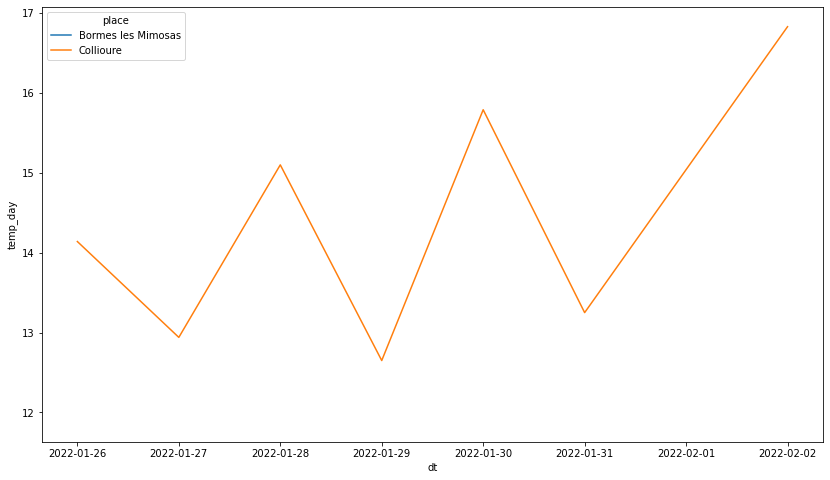

In [138]:
plot_temperature(top5)

There is only one day in the week where collioure isn't the hottest city <br>
The 1st of February, Bormes les Mimosas has the highest temperature of the day

In [122]:
forecast_df[forecast_df['dt'] == '2022-02-01'].sort_values(by='temp_day', ascending=False)[['dt', 'place_id', 'place', 'weather', 'temp_day', 'temp_min','temp_max']][0:5]

,dt,place_id,place,weather,temp_day,temp_min,temp_max
142,2022-02-01,282091180,Bormes les Mimosas,"[{'id': 800, 'main': 'Clear', 'description': '...",11.88,5.77,12.58
214,2022-02-01,282185152,Collioure,"[{'id': 800, 'main': 'Clear', 'description': '...",10.99,7.58,11.62
198,2022-02-01,282009726,Aigues Mortes,"[{'id': 800, 'main': 'Clear', 'description': '...",10.92,7.32,10.95
150,2022-02-01,281762295,Cassis,"[{'id': 800, 'main': 'Clear', 'description': '...",10.89,5.99,10.89
206,2022-02-01,282321559,Saintes Maries de la mer,"[{'id': 800, 'main': 'Clear', 'description': '...",10.37,7.26,10.37


> The best city the next 5 days is Collioure

In [199]:
forecast_df['ranking_day'] = forecast_df.groupby(['dt'])['temp_day'].rank(ascending=False)
#forecast_df['points_day'] = forecast_df['ranking_day']
forecast_df[['dt', 'place', 'temp_day', 'ranking_day']].sort_values(['dt', 'ranking_day'], ascending=[True, True])

,dt,place,temp_day,ranking_day
0,2021-09-01,Mont Saint Michel,22.76,1.0
8,2021-09-01,St Malo,20.12,2.0
40,2021-09-01,Paris,19.68,3.0
56,2021-09-01,Lille,18.00,4.0
16,2021-09-01,Bayeux,17.75,5.0
...,...,...,...,...
39,2021-09-08,Rouen,21.10,4.0
31,2021-09-08,Le Havre,19.55,5.0
23,2021-09-08,Bayeux,19.25,6.0
7,2021-09-08,Mont Saint Michel,19.20,7.0


In [210]:
forecast_df.groupby(['place_id','place'])['ranking_day'].agg('mean').sort_values(ascending=True)

place_id   place            
256305646  Paris                1.625
258697296  Mont Saint Michel    2.875
303984676  Rouen                3.750
259023929  Amiens               4.750
256373580  Lille                4.875
257654882  Bayeux               5.375
257985771  St Malo              5.750
256418097  Le Havre             7.000
Name: ranking_day, dtype: float64

### Top 5 cities with highest mean temperature

In [155]:
top_5 = forecast_df.groupby(['place_id','place'])['temp_day'].agg('mean').sort_values(ascending=False)[0:5].to_frame().reset_index()
top_5

,place_id,place,temp_day
0,282185152,Collioure,13.96125
1,282009726,Aigues Mortes,11.78625
2,282310054,Nimes,11.67250
3,282321559,Saintes Maries de la mer,11.61625
4,282091180,Bormes les Mimosas,11.61375


In [225]:
top_5 = top_5.astype({'place_id':np.int64})

In [ ]:
forecast_df[top_5]

In [202]:
coord_top_5 = cities_df[cities_df['place_id'].isin([int(val) for val in top_5['place_id'].values])]
coord_top_5 = coord_top_5.astype({'lat':np.float16, 'lon': np.float16})
coord_top_5[['place', 'place_id', 'lat', 'lon', 'display_name']]


,place,place_id,lat,lon,display_name
17,Bormes les Mimosas,282091180,43.15625,6.328125,"Bormes-les-Mimosas, Toulon, Var, Provence-Alpe..."
23,Nimes,282310054,43.84375,4.359375,"Nîmes, Gard, Occitanie, France métropolitaine,..."
24,Aigues Mortes,282009726,43.56250,4.191406,"Aigues-Mortes, Nîmes, Gard, Occitanie, France ..."
25,Saintes Maries de la mer,282321559,43.43750,4.429688,"Saintes-Maries-de-la-Mer, Arles, Bouches-du-Rh..."
26,Collioure,282185152,42.53125,3.083984,"Collioure, Céret, Pyrénées-Orientales, Occitan..."


In [226]:
top_5

,place_id,place,temp_day
0,282185152,Collioure,13.96125
1,282009726,Aigues Mortes,11.78625
2,282310054,Nimes,11.67250
3,282321559,Saintes Maries de la mer,11.61625
4,282091180,Bormes les Mimosas,11.61375


In [219]:
top5 = top5.astype({'place_id':np.int64})

In [235]:
top_cities = coord_top_5.merge(top_5, left_on='place_id', right_on='place_id', suffixes=(None, '_y') )[['place_id', 'place', 'lat', 'lon', 'display_name', 'temp_day']]
top_cities

,place_id,place,lat,lon,display_name,temp_day
0,282091180,Bormes les Mimosas,43.15625,6.328125,"Bormes-les-Mimosas, Toulon, Var, Provence-Alpe...",11.61375
1,282310054,Nimes,43.84375,4.359375,"Nîmes, Gard, Occitanie, France métropolitaine,...",11.67250
2,282009726,Aigues Mortes,43.56250,4.191406,"Aigues-Mortes, Nîmes, Gard, Occitanie, France ...",11.78625
3,282321559,Saintes Maries de la mer,43.43750,4.429688,"Saintes-Maries-de-la-Mer, Arles, Bouches-du-Rh...",11.61625
4,282185152,Collioure,42.53125,3.083984,"Collioure, Céret, Pyrénées-Orientales, Occitan...",13.96125


In [203]:
import plotly.graph_objects as go

import plotly.express as px

In [279]:

def plot_map(X, cluster_column, cluster_centers=None, title='Hot zones', size='temp_day'):
    '''
    X: dataframe with Lat et Lon features
    cluster_column: Name of the column containing the cluster
    cluster_centers: Centers of clusters
    '''
    
    fig = px.scatter_mapbox(X, lat="lat", lon="lon", color=cluster_column, zoom=4, mapbox_style="carto-positron", 
                            size=size,
                             hover_data=['place'],
                            title=title)
    
    
    fig.update_layout(autosize=False, width=850, height=600)

    fig.show()

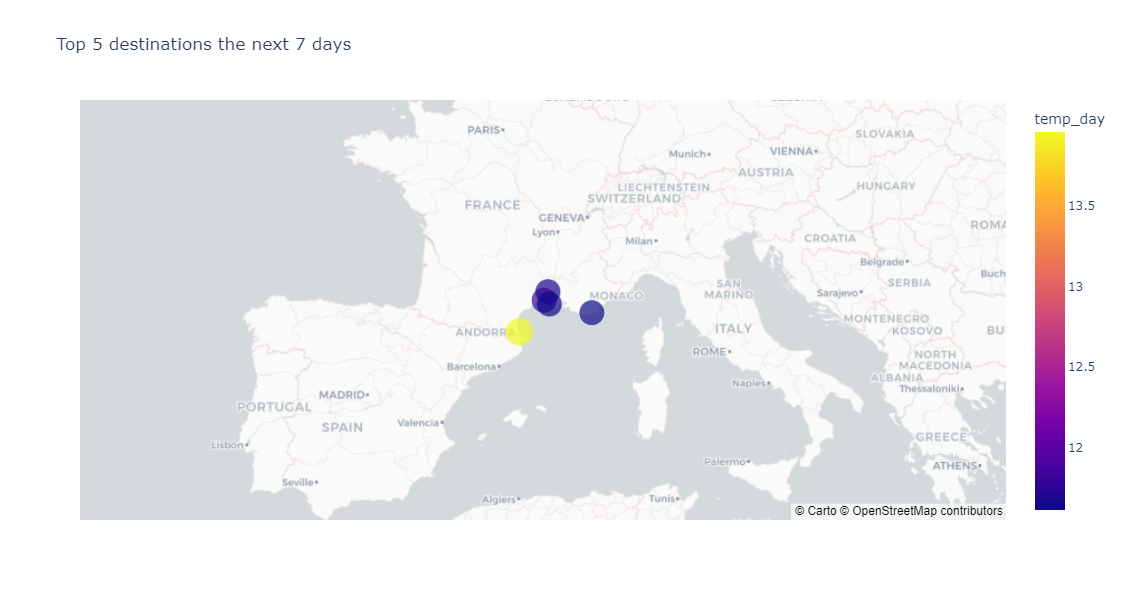

In [280]:
plot_map(top_cities, 'temp_day', title='Top 5 destinations the next 7 days')

In [297]:
top_cities

,place_id,place,lat,lon,display_name,temp_day
0,282091180,Bormes les Mimosas,43.15625,6.328125,"Bormes-les-Mimosas, Toulon, Var, Provence-Alpe...",11.61375
1,282310054,Nimes,43.84375,4.359375,"Nîmes, Gard, Occitanie, France métropolitaine,...",11.67250
2,282009726,Aigues Mortes,43.56250,4.191406,"Aigues-Mortes, Nîmes, Gard, Occitanie, France ...",11.78625
3,282321559,Saintes Maries de la mer,43.43750,4.429688,"Saintes-Maries-de-la-Mer, Arles, Bouches-du-Rh...",11.61625
4,282185152,Collioure,42.53125,3.083984,"Collioure, Céret, Pyrénées-Orientales, Occitan...",13.96125


### Top 20 hotels in top 5 cities

In [298]:
hotels = pd.read_csv('../data/booking_result.csv')

In [300]:
hotels.head(5)

,city,name,url,latitude,longitude,desc,etoiles,note,reviews
0,Mont Saint Michel,Mercure Mont Saint Michel,/hotel/fr/mont-saint-michel.fr.html,-1.510545,48.614247,Installé dans des espaces verts à seulement 2 ...,4.0,"8,2",3 140
1,Mont Saint Michel,Hôtel Vert,/hotel/fr/vert.fr.html,-1.509617,48.614700,"Situé à 2 km du Mont-Saint-Michel, sur la côte...",2.0,"8,1",3 670
2,Mont Saint Michel,Hotel De La Digue,/hotel/fr/de-la-digue.fr.html,-1.510918,48.616882,L'hôtel De La Digue est un établissement tradi...,3.0,"7,2",1 926
3,Mont Saint Michel,Le Saint Aubert,/hotel/fr/hotel-saint-aubert.fr.html,-1.510105,48.612938,"Niché dans un écrin de verdure, à seulement 2 ...",3.0,"7,4",1 257
4,Mont Saint Michel,La Vieille Auberge,/hotel/fr/la-vieille-auberge-le-mont-saint-mic...,-1.511457,48.636063,La Vieille Auberge se trouve dans le village m...,2.0,"7,5",1 260


In [301]:
top_cities['place']

0          Bormes les Mimosas
1                       Nimes
2               Aigues Mortes
3    Saintes Maries de la mer
4                   Collioure
Name: place, dtype: object

In [302]:
top20_hotels = hotels[hotels['city'].isin(top_cities['place'].values)]
top20_hotels = top20_hotels.sort_values('note', ascending=False)[0:21]

In [303]:
top20_hotels = top20_hotels.rename(columns={'latitude':'lon', 'longitude':'lat', 'city':'place'})

In [304]:
top20_hotels['note'] = top20_hotels['note'].str.replace(',', '.')

In [305]:
top20_hotels = top20_hotels.astype({'note':np.float16})
top20_hotels = top20_hotels.astype({'reviews':np.float16})

In [307]:
top20_hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 4515 to 3593
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   place    21 non-null     object 
 1   name     21 non-null     object 
 2   url      21 non-null     object 
 3   lon      21 non-null     float64
 4   lat      21 non-null     float64
 5   desc     21 non-null     object 
 6   etoiles  14 non-null     float64
 7   note     21 non-null     float16
 8   reviews  21 non-null     float16
dtypes: float16(2), float64(3), object(4)
memory usage: 1.4+ KB


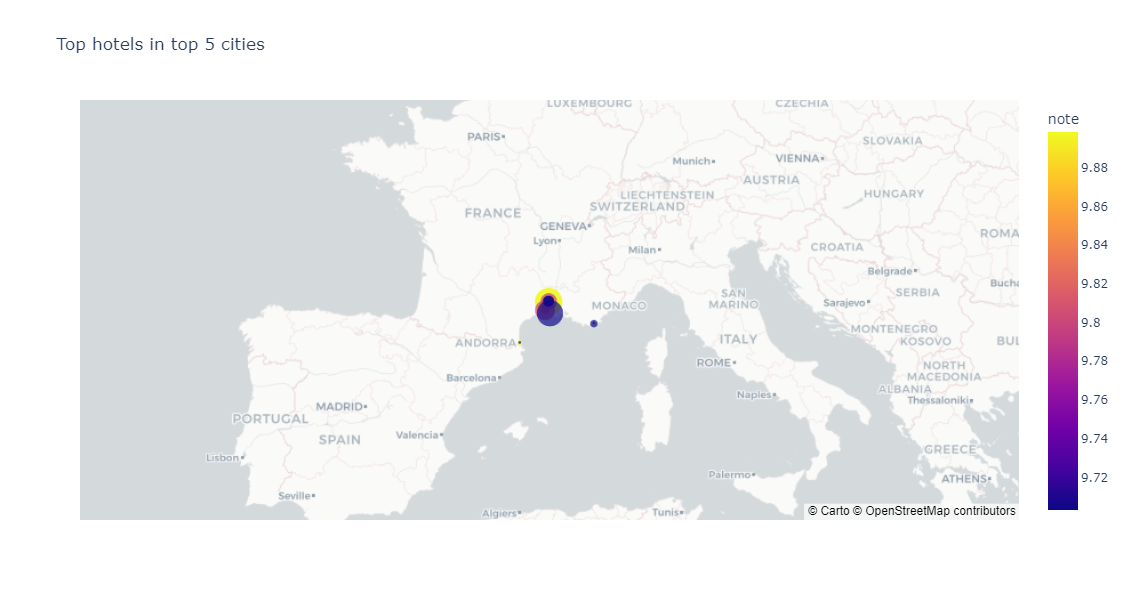

In [309]:
plot_map(top20_hotels, cluster_column='note', size='reviews', title='Top hotels in top 5 cities')